# Assignment 6 Hypothesis Testing (Chi Square)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from   scipy   import   stats
from scipy.stats import ttest_1samp

# Two Tailed T-test

In [24]:
# read the data
df = pd.read_csv('demographics.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     507 non-null    int64  
 1   wgt     507 non-null    float64
 2   hgt     507 non-null    float64
 3   sex     507 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 16.0 KB


In [25]:
# describe the age column
df['age'].describe()

count    507.000000
mean      30.181460
std        9.608472
min       18.000000
25%       23.000000
50%       27.000000
75%       36.000000
max       67.000000
Name: age, dtype: float64

In [26]:
# calculate and display the mean hgt
hgt_mean = round( np.mean(df.hgt),2)
print('mean hgt=',hgt_mean)

mean hgt= 171.14


In [36]:
# Conduct a two tailed t-test to determine if the mean hgt differs from 150 at alpha = 0.05,
# and print the results
# Ho:  mean hgt = 150
# H1: mean hgt <> 150


# t test
hgt1 = df.hgt[0:9]
hgt2 = np.array([174.1, 183.0, 165.1, 167.6, 190.5,175.3])

res = stats.ttest_ind(hgt1,hgt2)
print('Two sample t-test=',res )


Two sample t-test= Ttest_indResult(statistic=1.5621110568329202, pvalue=0.14226851090797327)


In [29]:
# Analysis: Complete this sentence
# Because p ____<____ alpha, we ___reject_____ the null hypothesis
# and conclude that _______there's evidence the mean hgt differs from 150_____________________________

# Chi squared Test of Independence

In [6]:
## Chi: Square Test of Independence, alpha = 0.05
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import scipy.stats as stats

In [7]:
# read the chisqdata
df =  pd.read_csv("chisqdata2.csv")

In [8]:
# display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gender        20 non-null     object
 1   exercisewkly  20 non-null     object
 2   group         20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [9]:
# display head of data
df.head(10)

,gender,exercisewkly,group
0,male,yes,A
1,female,yes,B
2,female,no,C
3,female,no,D
4,female,no,B
5,female,yes,C
6,female,yes,A
7,male,yes,B
8,male,yes,C
9,male,no,B


<AxesSubplot:xlabel='gender', ylabel='count'>

Text(0.5, 1.0, 'Gender')

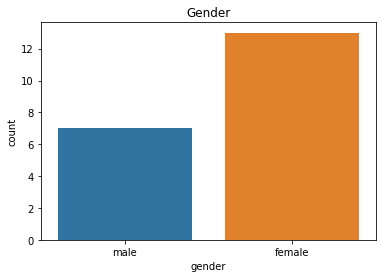

In [10]:
# create a Seaborn count plot of Gender
sns.countplot(x="gender", data=df)
plt.title('Gender')

<AxesSubplot:xlabel='exercisewkly', ylabel='count'>

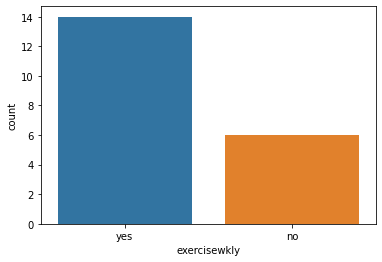

In [15]:
# make a Seaborn bar plot of exercisewkly

sns.countplot(x=df.exercisewkly)

In [16]:
# We need a cross table of the counts for gender and exercise weekly
# You will use the cross table for the Chi Square test
crosstab = pd.crosstab(df.gender,df.exercisewkly,margins=True,margins_name="Totals")
crosstab


exercisewkly,no,yes,Totals
gender,,,
female,4,9,13
male,2,5,7
Totals,6,14,20


In [17]:
# Conduct the Chi square test on the cross table data (use the variable you saved it in). 
#  print the Chi square p value
# See document for return values
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi2, p, dof, ex = stats.chi2_contingency(crosstab)

print('\n chi square test statistic = ', round(chi2,4))
print('\n p-value = ',round(p,5))


 chi square test statistic =  0.0105

 p-value =  0.99999


In [ ]:
# Analysis:  Complete the sentence
# Because __>____, we fail to reject the null hypothesis. We conclude that gender
# and weekly exercies are ____not related_______

# Analysis of Variance (ANOVA) 

In [18]:
# read the dat
df = pd.read_csv('anovadata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     20 non-null     int64  
 1   wgt     20 non-null     float64
 2   hgt     20 non-null     float64
 3   sex     20 non-null     int64  
 4   group   20 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [19]:
# display the first few records of the data set
df.head()

,age,wgt,hgt,sex,group
0,21,65.6,174.0,1,A
1,23,71.8,175.3,1,B
2,28,80.7,193.5,1,C
3,23,72.6,186.5,1,A
4,22,78.8,187.2,1,A


[Text(0.5, 1.0, 'Wgt and Test Group'),
 Text(0.5, 0, 'wgt'),
 Text(0, 0.5, 'Test Group')]

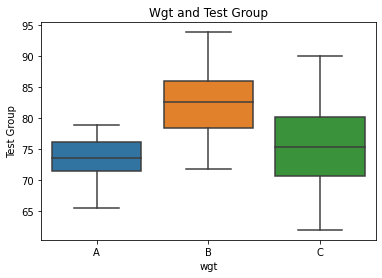

In [20]:
# create a boxplot for wgt grouped by test group
ax = sns.boxplot(x='group', y ='wgt', data=df)
ax.set(title='Wgt and Test Group',xlabel='wgt',ylabel='Test Group')

In [21]:
# Conduct an ANOVA Test on wgt ~ group
# print the ANOVA test model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("wgt ~ group", data= df).fit()
aov_table = sm.stats.anova_lm(model,typ=2)
print(aov_table)

              sum_sq    df        F    PR(>F)
group     308.760917   2.0  2.87299  0.084164
Residual  913.497083  17.0      NaN       NaN


In [22]:
# Conduct a Tukey Post-Hoc Test to determine if any groups differ
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['wgt'], df['group'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.9875,0.0876,-1.1658,19.1408,False
A,C,2.3833,0.8287,-8.471,13.2377,False
B,C,-6.6042,0.2457,-16.7575,3.5491,False


In [23]:
# Analysis: State which groups differ from any other groups? If none, then state that. 
# You should justify your answer by referencing the p-adj value and alpha = 0.05

##None of the groups differ from one another as the reject column is false for all groups